# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [19]:
import numpy as np

affitto = np.array([720, 980, 650, 1200], dtype=float)
somma1 = affitto.sum()

affitto[3] += affitto[3] * 0.12
affitto

somma2 = affitto.sum()

affitto[2] += -(affitto[2] * 0.10)
affitto

affitto[0:2] += affitto[0:2] *0.05
affitto

affitto.sum()

((somma2 - somma1) / somma1) *100

4.056338028169014

## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

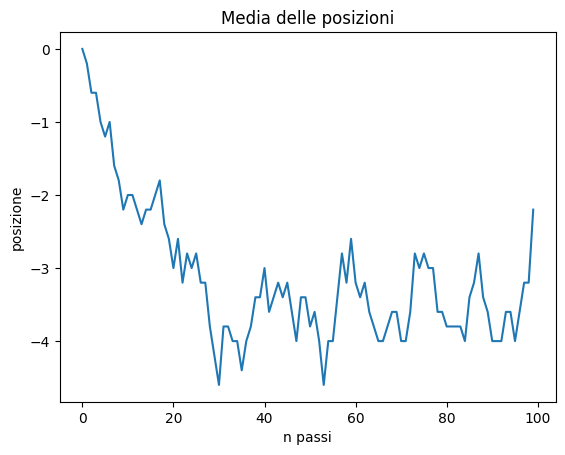

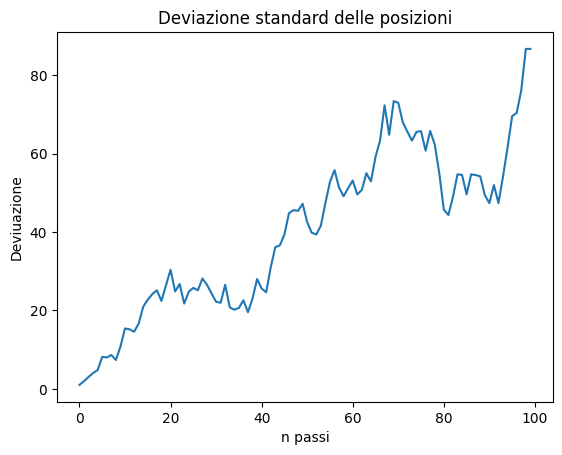

In [291]:
import random
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib

def cammino(n, nc):
    media = np.zeros(n)
    varianza = np.zeros(n)
    conto = np.zeros(nc)
    
    for i in range(n):
        
        for j in range(nc):
            
            passo = random.randint(0,1)
            if passo == 0:
                passo = -1
            conto[j] += passo
            
        media[i] = conto.mean()    
        varianza[i] = np.var(conto)
    
    return media, varianza

a = cammino(100,10)
plt.plot(a[0])
plt.title('Media delle posizioni')
plt.xlabel('n passi')
plt.ylabel('posizione')
plt.show()
plt.plot(a[1])
plt.title('Deviazione standard delle posizioni')
plt.xlabel('n passi')
plt.ylabel('Deviuazione')
plt.show()



## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [138]:
np.random.seed(42)
a = np.array(np.random.normal(0,1,45)).reshape(5,9)
print(a)

minVal= []
for i in range(a.shape[0]):
    index = (abs(a[i,:]-0.1)).argmin()
    minVal.append(a[i,index])

minVal


[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]


[-0.13826430117118466,
 0.24196227156603412,
 0.11092258970986608,
 -0.013497224737933921,
 0.1713682811899705]

## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


     PassengerId  Survived  Pclass                                   Name   
258          259         1       1                       Ward, Miss. Anna  \
737          738         1       1                 Lesurer, Mr. Gustave J   
679          680         1       1     Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1             Fortune, Miss. Mabel Helen   
27            28         0       1         Fortune, Mr. Charles Alexander   
341          342         1       1         Fortune, Miss. Alice Elizabeth   
438          439         0       1                      Fortune, Mr. Mark   
311          312         1       1             Ryerson, Miss. Emily Borie   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   
118          119         0       1               Baxter, Mr. Quigg Edmond   

        Sex   Age  SibSp  Parch    Ticket      Fare            Cabin Embarked   
258  female  35.0      0      0  PC 17755  512.3292              NaN   

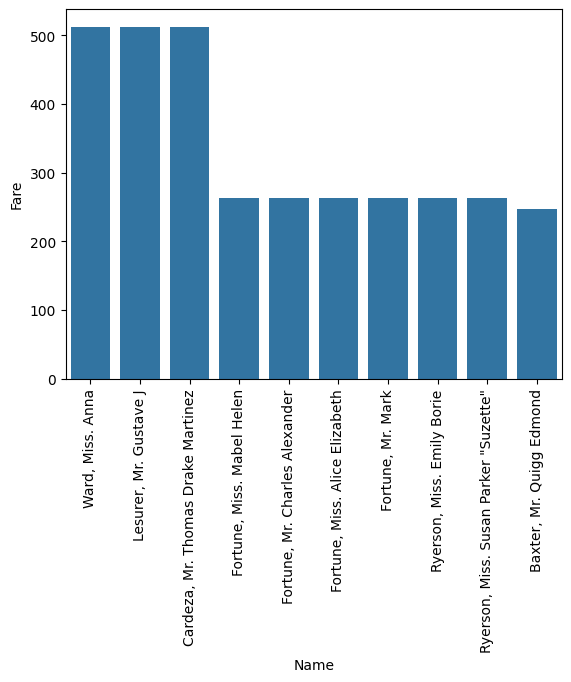

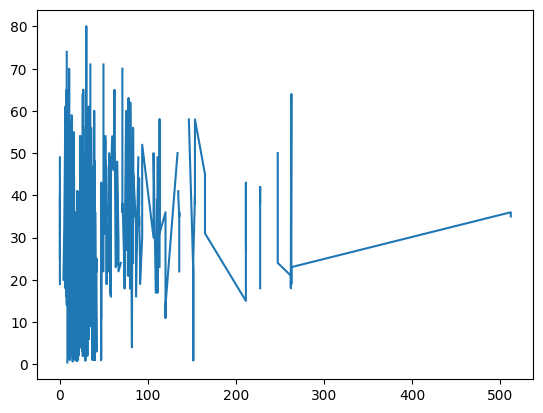

In [186]:
import pandas as pd
import seaborn as sns

titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic

titanic.sort_values(['Fare'], ascending=False).head(10)

titanic['Age'].mean()
titanic['Fare'].mean()
titanic['SibSp'].mean()

titanic['Family_index'] = (titanic['SibSp'] + titanic['Parch'])/ titanic['Fare']
titanic

titanic['Family_index'].argmax()
titanic.iloc[68]

titanic[titanic['Fare'] > 100]

bar = titanic.sort_values(['Fare'], ascending=False).head(10)
print(bar)

sns.barplot(bar, x='Name', y='Fare')
plt.xticks(rotation = 90)
plt.show()

linee = titanic.sort_values(['Fare'], ascending=False)
plt.plot(linee['Fare'], linee['Age'])


## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Torgersen            39.1           18.7              181.0  \
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  


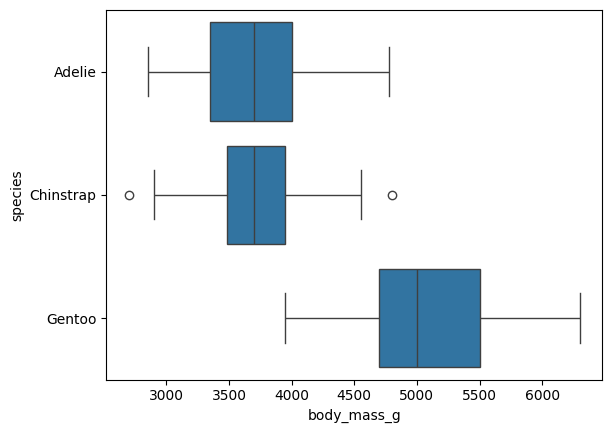

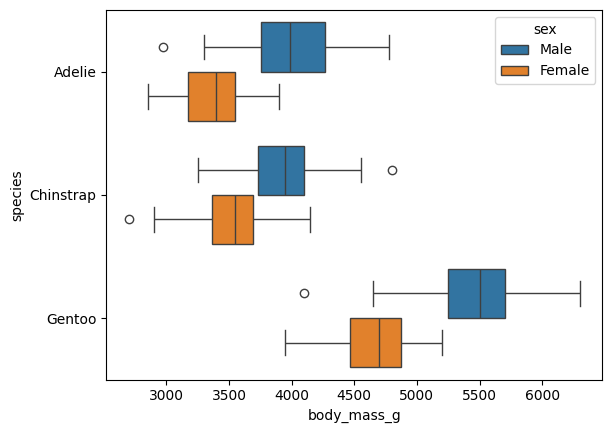

In [230]:
peng = sns.load_dataset("penguins")
print(peng.head(3))

peng.shape
peng.isna().sum()

peng['sex'].mode()[0]
peng['sex'].fillna( 'Male', inplace=True)

peng.isna().sum()

peng.dropna(subset=['body_mass_g'], inplace=True)
peng.isna().sum()
peng.shape

peng.duplicated().sum()  #se uguale 0 significa che non ci sono true

massa = peng.groupby('species')['body_mass_g'].mean()

sns.boxplot(peng, x='body_mass_g', y='species')
plt.show()

sns.boxplot(peng, x='body_mass_g',y='species', hue='sex')
plt.show()



## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


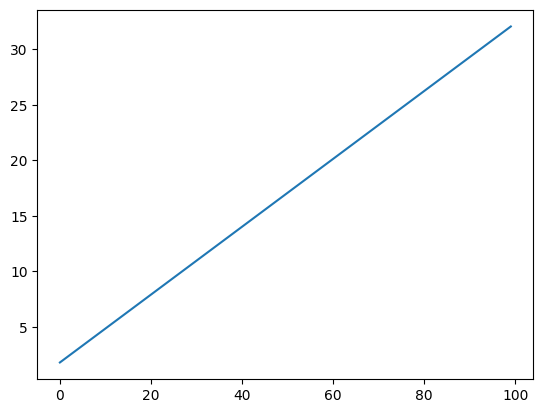

In [ ]:
from scipy.optimize import curve_fit

x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, 100)

def func(x, a, b):
    return a * x + b

def fit_line(x, y):
    popt, pcov = curve_fit(func, x, y)
    string = f"y = {popt[0]:.2f} * x + {popt[1]:.2f}"
    return round(popt[0], 3), round(popt[1],3), string

a = fit_line(x, y)
a

plt.plot(func(x, a[0], a[1]))
